In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("T1.csv")

In [5]:
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [6]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [8]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [9]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'],format='%d %m %Y %H:%M')

In [10]:

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null datetime64[ns]
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [11]:
df['Month']=df['Date/Time'].dt.month
df['Day']=df['Date/Time'].dt.day 
df['hour']=df['Date/Time'].dt.hour 


In [12]:
df['year']=df['Date/Time'].dt.year 

/home/omkar/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


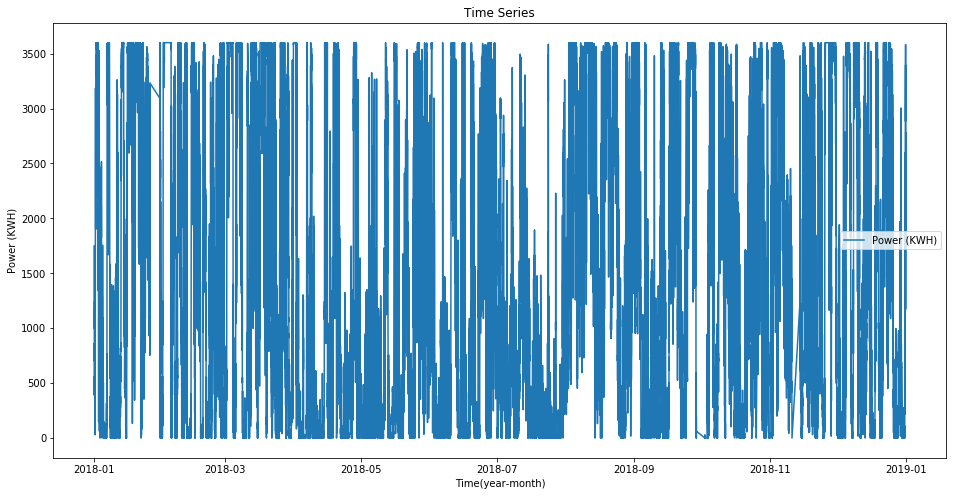

In [13]:

df.index = df['Date/Time'] # indexing the Datetime to get the time period on the x-axis.
ts = df['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Power (KWH)')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Power (KWH)")
plt.legend(loc='best')

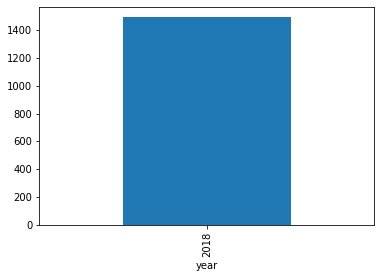

In [14]:
df.groupby('year')['Theoretical_Power_Curve (KWh)'].mean().plot.bar()

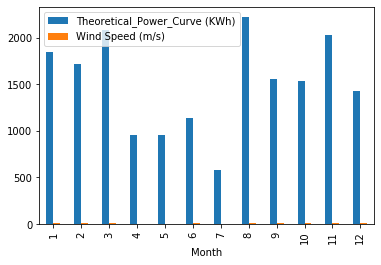

In [15]:
df.groupby('Month')['Theoretical_Power_Curve (KWh)','Wind Speed (m/s)'].mean().plot.bar()

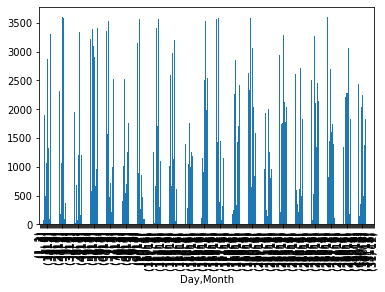

In [16]:
df.groupby(['Day','Month'])['Theoretical_Power_Curve (KWh)'].mean().plot.bar()

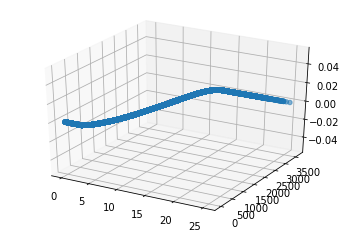

In [17]:


from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
ax.scatter(df['Wind Speed (m/s)'],df['Theoretical_Power_Curve (KWh)'] , zs=0, zdir='z', label='curve in (x, y)')



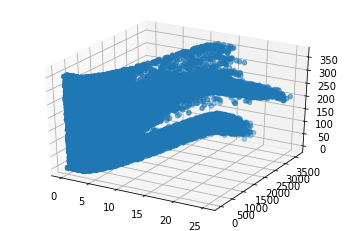

In [18]:

X_ax = df['Wind Speed (m/s)']
Y_ax = df['Wind Direction (°)']
Z_ax = df['Theoretical_Power_Curve (KWh)']

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(X_ax,Z_ax,Y_ax, 'gray')

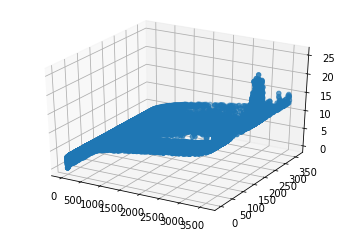

In [19]:

X_ax = df['Wind Speed (m/s)']
Y_ax = df['Wind Direction (°)']
Z_ax = df['Theoretical_Power_Curve (KWh)']

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(Z_ax,Y_ax,X_ax, 'gray')

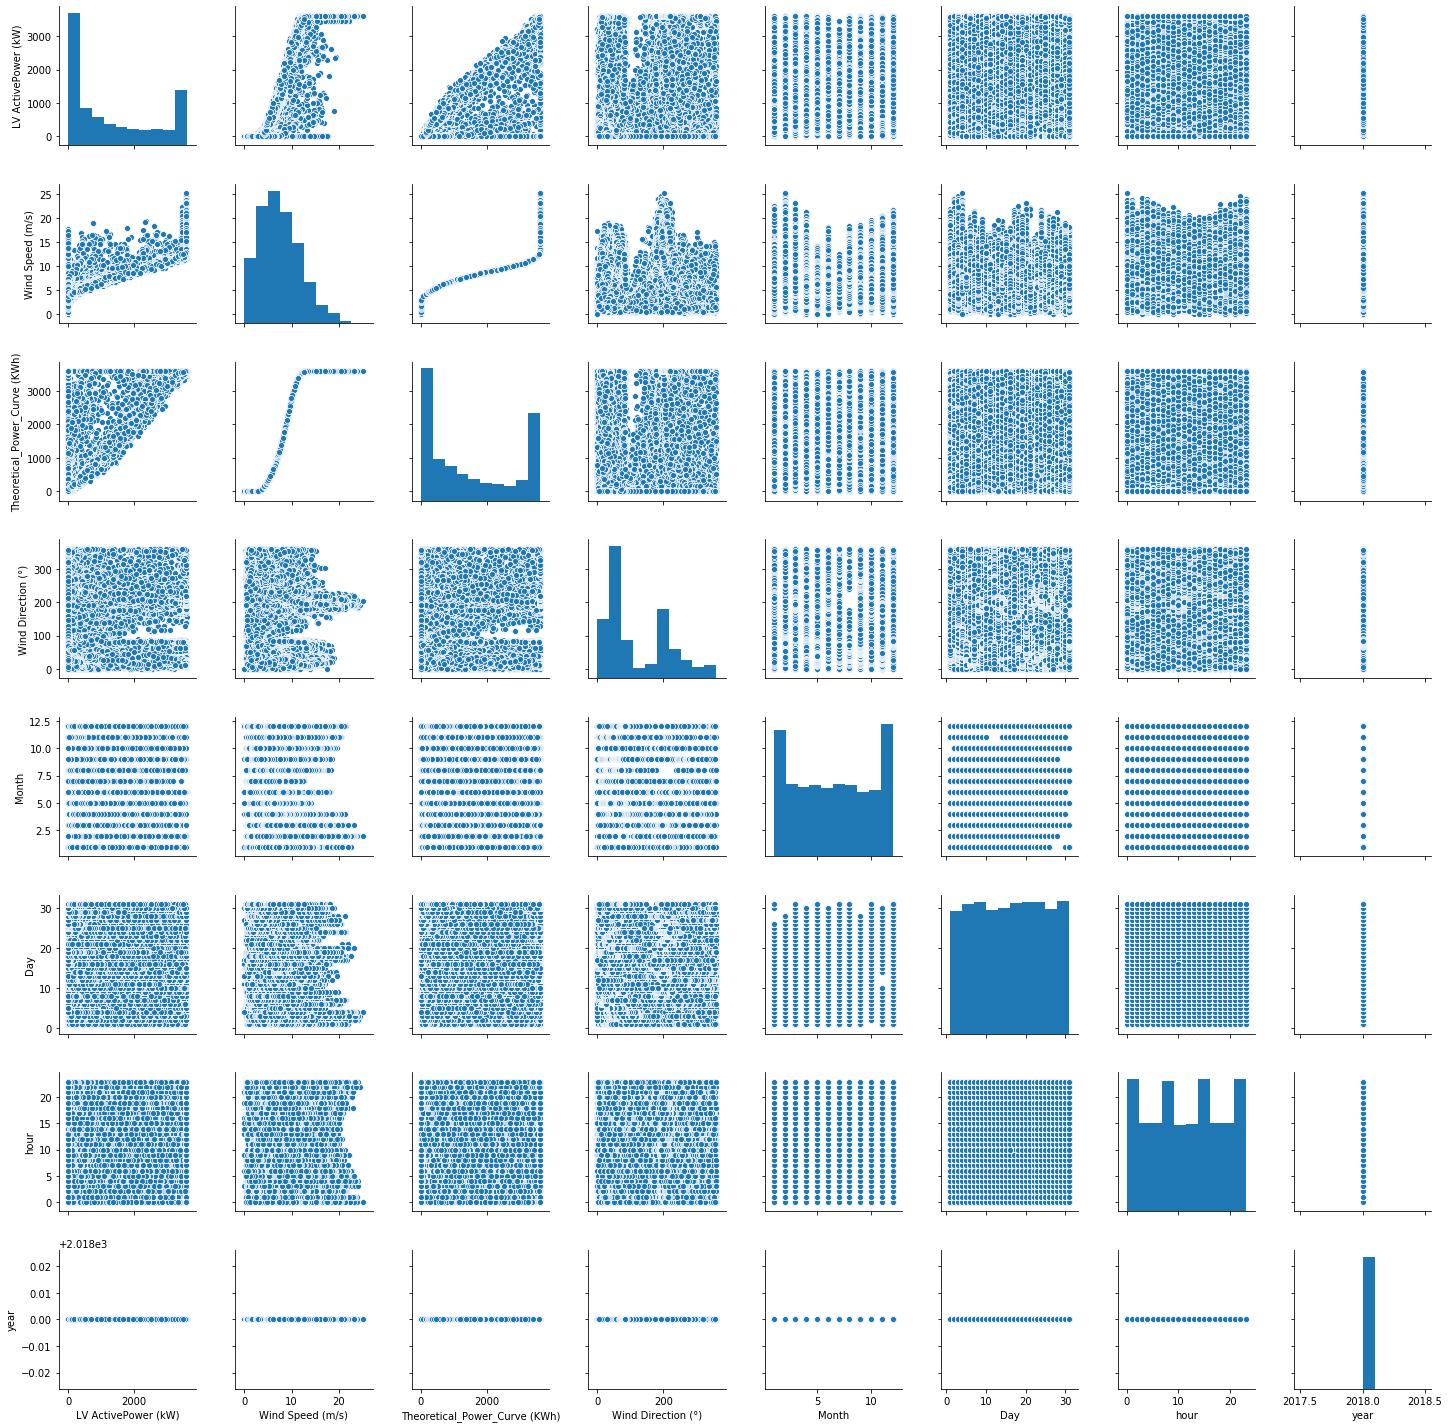

In [20]:
import seaborn as sns
g = sns.pairplot(df)


In [21]:
x = df.drop('Theoretical_Power_Curve (KWh)',axis = 1)

In [22]:
y = df['Theoretical_Power_Curve (KWh)']

In [23]:
x = df.drop(['Theoretical_Power_Curve (KWh)','Date/Time'],axis = 1)

In [24]:
x

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),Month,Day,hour,year
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,259.994904,1,1,0,2018
2018-01-01 00:10:00,453.769196,5.672167,268.641113,1,1,0,2018
2018-01-01 00:20:00,306.376587,5.216037,272.564789,1,1,0,2018
2018-01-01 00:30:00,419.645905,5.659674,271.258087,1,1,0,2018
2018-01-01 00:40:00,380.650696,5.577941,265.674286,1,1,0,2018
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,80.502724,12,31,23,2018
2018-12-31 23:20:00,1684.353027,7.332648,84.062599,12,31,23,2018
2018-12-31 23:30:00,2201.106934,8.435358,84.742500,12,31,23,2018


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=6)),('linear', LinearRegression(fit_intercept=False))])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [28]:
model = model.fit(X_train,y_train)

In [30]:
import pickle

pickle.dump(model, open('model.pkl','wb'))

In [31]:
pred_x = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred_x))

y_test.shape

Mean squared error: 1056.57


(15159,)

In [33]:
X_test.iloc[:,1].shape

(15159,)

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_x)


19.98073511829404

In [35]:
print(pred_x)

[3446.44797751 3014.05196025  847.48305941 ...  -16.1834559    14.3699429
 2716.51061311]


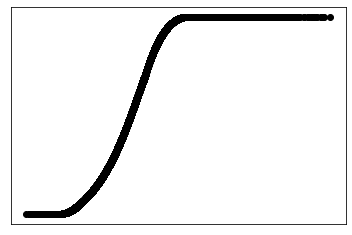

In [36]:

plt.scatter(X_test.iloc[:,1],y_test, color='black')


plt.xticks(())
plt.yticks(())

plt.show()

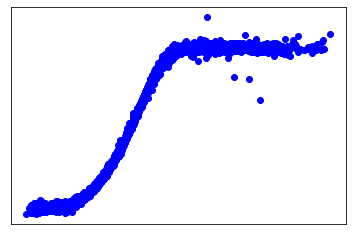

In [37]:
plt.scatter(X_test.iloc[:,1],pred_x,color='blue')
plt.xticks(())
plt.yticks(())

plt.show()


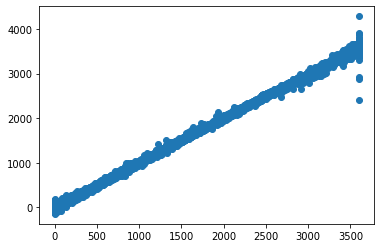

In [38]:
plt.scatter(y_test,pred_x)
plt.show()


In [41]:
print(X_test.iloc[0,:])

LV ActivePower (kW)    3348.910889
Wind Speed (m/s)         11.632760
Wind Direction (°)      188.499802
Month                     3.000000
Day                       2.000000
hour                     10.000000
year                   2018.000000
Name: 2018-03-02 10:40:00, dtype: float64


In [43]:
print(pred_x[0])

3446.4479775149375


In [44]:
print(y_test[0])

3452.91871753055
